In [ ]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [ ]:
# Define angles and initialize the circuit
theta = 1.2
phi = 2.1

# We need 3 quantum bits and 1 classical bit (to measure Bob's qubit at the end)
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)
# Initialize qubit 0 in unknown state |ψ>
qc.ry(theta, 0)
qc.rz(phi, 0)

qc.barrier();

In [ ]:
# Entanglement, Teleportation, and Quantum Correction
# Entangle Qubit 1 (Alice) and Qubit 2 (Bob)
qc.h(1)
qc.cx(1, 2)

qc.barrier()
# Alice performs a Bell-basis measurement preparation
qc.cx(0, 1)
qc.h(0)

qc.barrier()
# Instead of classical measurement, we use quantum controlled gates
qc.cx(1, 2)
qc.cz(0, 2)

qc.barrier();

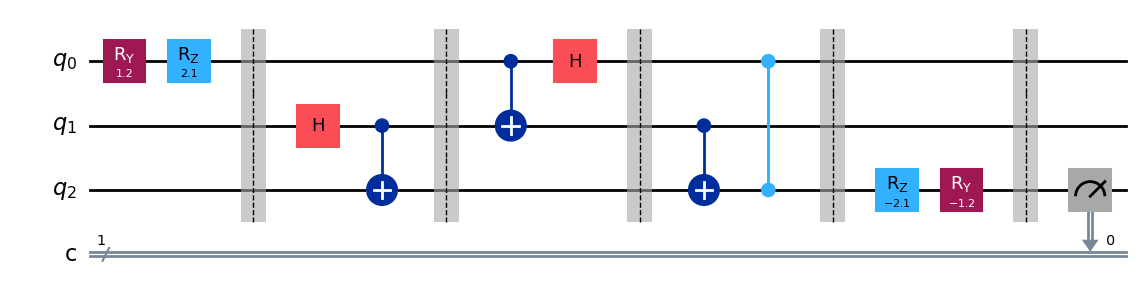

In [ ]:

# Apply the inverse operations to Qubit 2 in reverse order with negative angles
qc.rz(-phi, 2)
qc.ry(-theta, 2)

qc.barrier()

# Measure Bob's qubit (Qubit 2) into the classical bit (Bit 0)
qc.measure(2, 0)

# Draw the full circuit diagram
qc.draw('mpl')

Measurement counts: {'0': 5000}


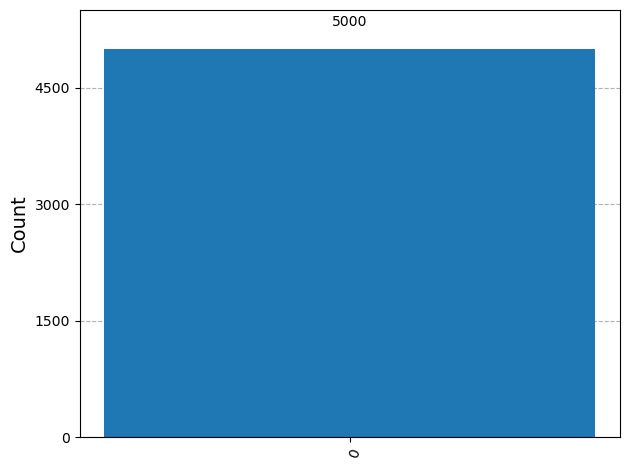

In [6]:
# Plot the histogram
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=5000)
result = job.result()

counts = result.get_counts()
print("Measurement counts:", counts)


plot_histogram(counts)